# Tests de convergence de l’operateur de diffusion aux elements

In [1]:
from trustutils import run 

run.introduction("Y. Gorsse")
run.description("Cas test avec cl de Dirichlet, dont la solution analytique est un produit de sinus.")
run.TRUST_parameters()

## Introduction 
 Validation made by : Y. Gorsse



 Report generated 31/01/2022

### Description 
Cas test avec cl de Dirichlet, dont la solution analytique est un produit de sinus.

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/Verification/PolyMAC/convergence_conduction/build)

In [2]:
from trustutils import run

dico_meshes_2D = {
    "Cartesian":[1,2,3], 
    "Locally_Refined":[1,2,3],
    "Quadrangles":[1,2,3],
    "Triangles":[1,2,3]
}

for m in dico_meshes_2D.keys():
    for i in dico_meshes_2D[m]:
        run.addCase("./%s/jdd_%d" % (m, i), "cas.data", nbProcs=1)

run.printCases()
run.runCases()

### Test cases 
* Cartesian/jdd_1/cas.data : 
* Cartesian/jdd_2/cas.data : 
* Cartesian/jdd_3/cas.data : 
* Locally_Refined/jdd_1/cas.data : 
* Locally_Refined/jdd_2/cas.data : 
* Locally_Refined/jdd_3/cas.data : 
* Quadrangles/jdd_1/cas.data : 
* Quadrangles/jdd_2/cas.data : 
* Quadrangles/jdd_3/cas.data : 
* Triangles/jdd_1/cas.data : 
* Triangles/jdd_2/cas.data : 
* Triangles/jdd_3/cas.data : 


Running ...
  => A total of 12 cases were (successfully) run in 3.0s.


## Maillages Triangles 

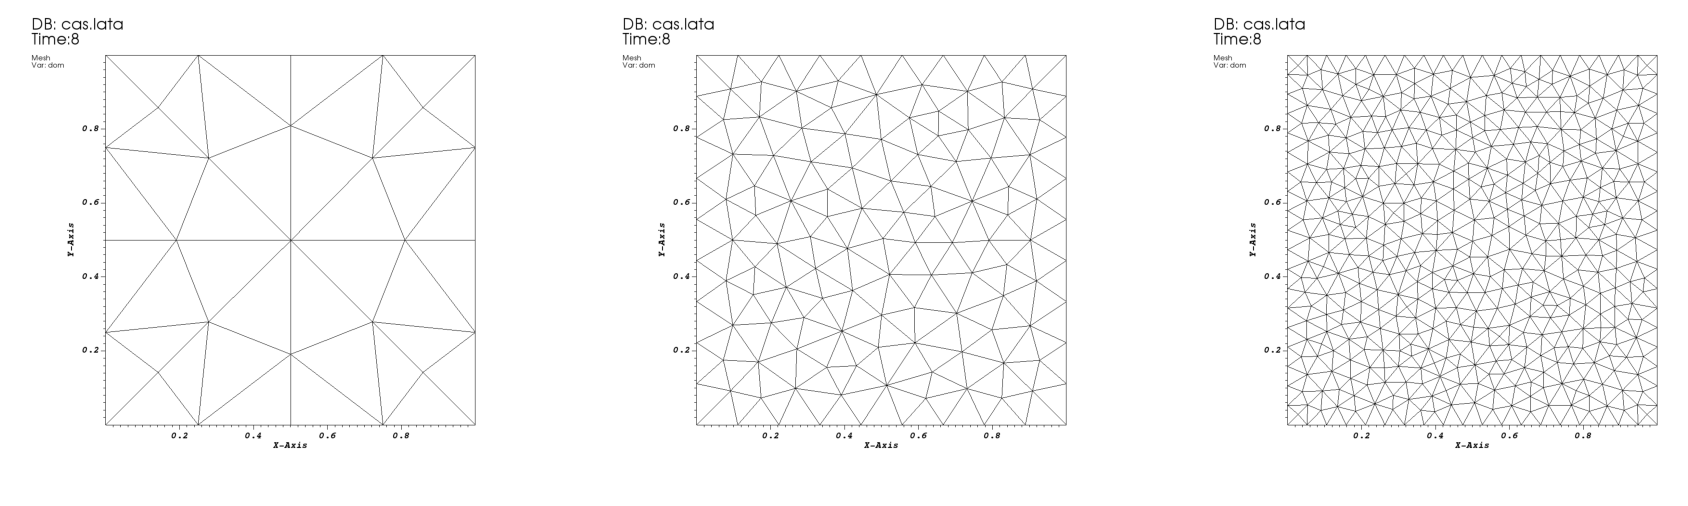

In [3]:
from trustutils import visit
plot=visit.Show("Triangles/jdd_1/cas.lata",field="Mesh",name="dom",nY=3) 
plot.add("Triangles/jdd_2/cas.lata",field="Mesh",name="dom",yIndice=1) 
plot.add("Triangles/jdd_3/cas.lata",field="Mesh",name="dom",yIndice=2)  
plot.plot()

## Maillages Quadrangles

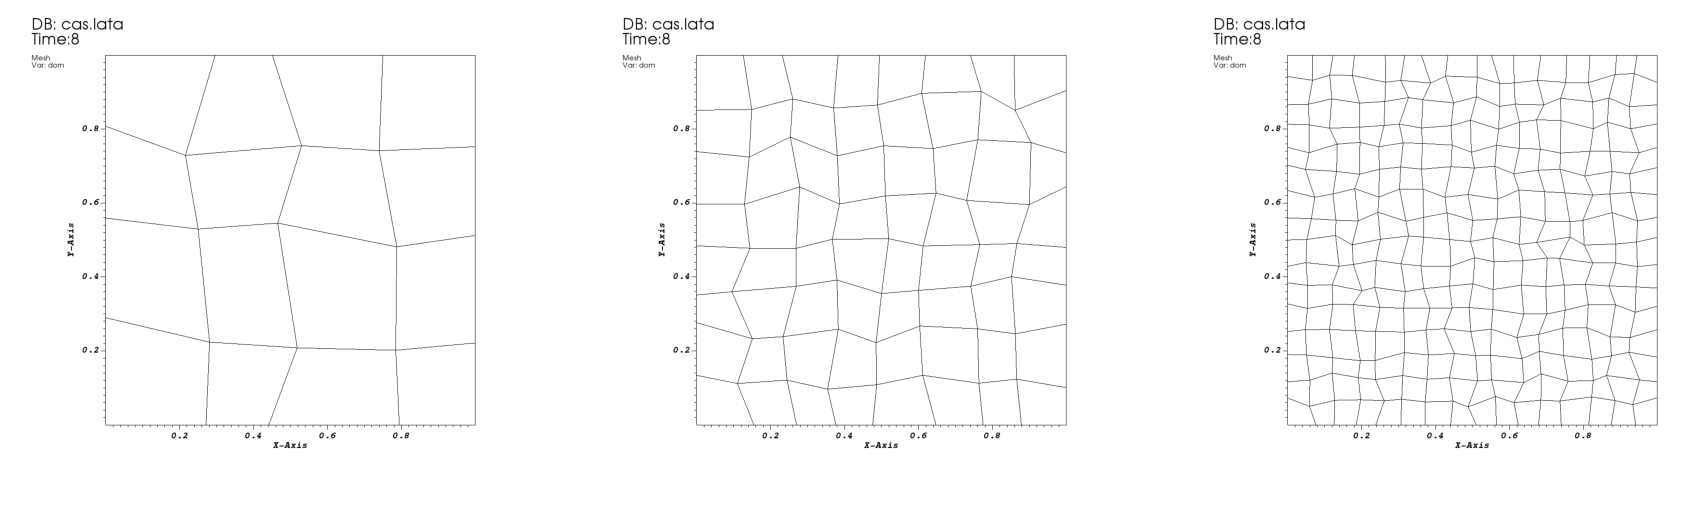

In [4]:
plot=visit.Show("Quadrangles/jdd_1/cas.lata",field="Mesh",name="dom",nY=3) 
plot.add("Quadrangles/jdd_2/cas.lata",field="Mesh",name="dom",yIndice=1) 
plot.add("Quadrangles/jdd_3/cas.lata",field="Mesh",name="dom",yIndice=2)  
plot.plot()

## Maillages Cartesian

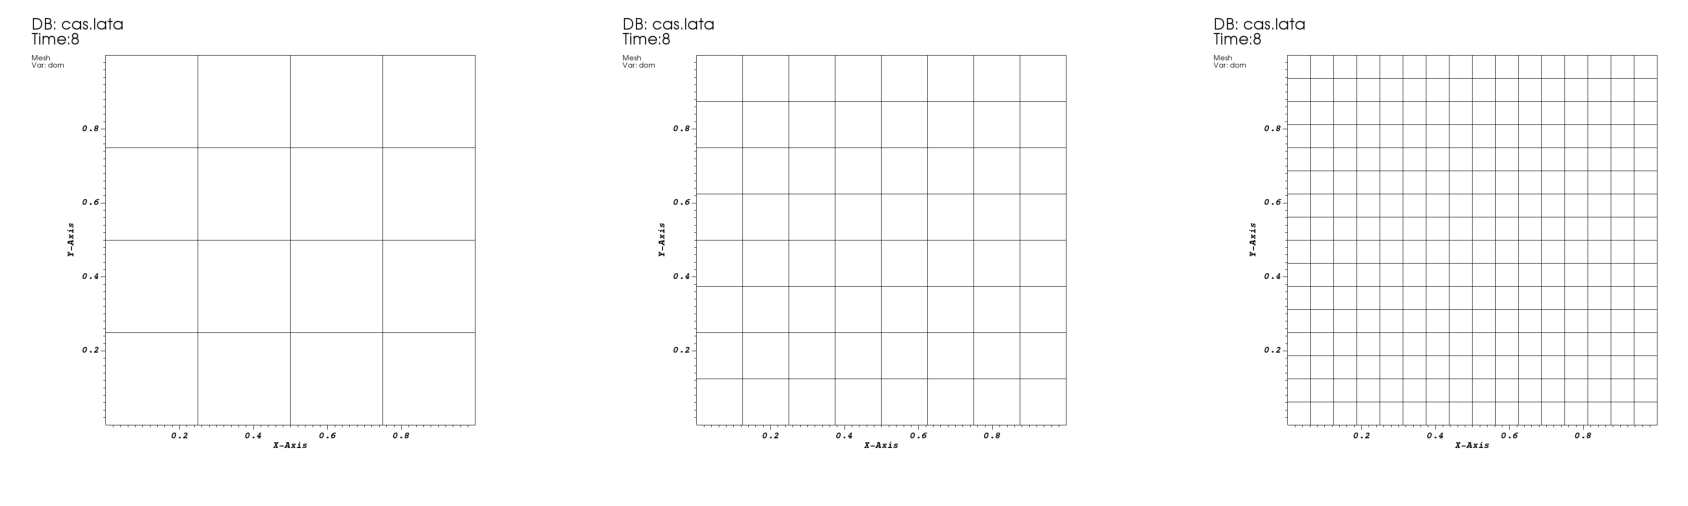

In [5]:
plot=visit.Show("Cartesian/jdd_1/cas.lata",field="Mesh",name="dom",nY=3) 
plot.add("Cartesian/jdd_2/cas.lata",field="Mesh",name="dom",yIndice=1) 
plot.add("Cartesian/jdd_3/cas.lata",field="Mesh",name="dom",yIndice=2)  
plot.plot()

## Maillages Locally_Refined

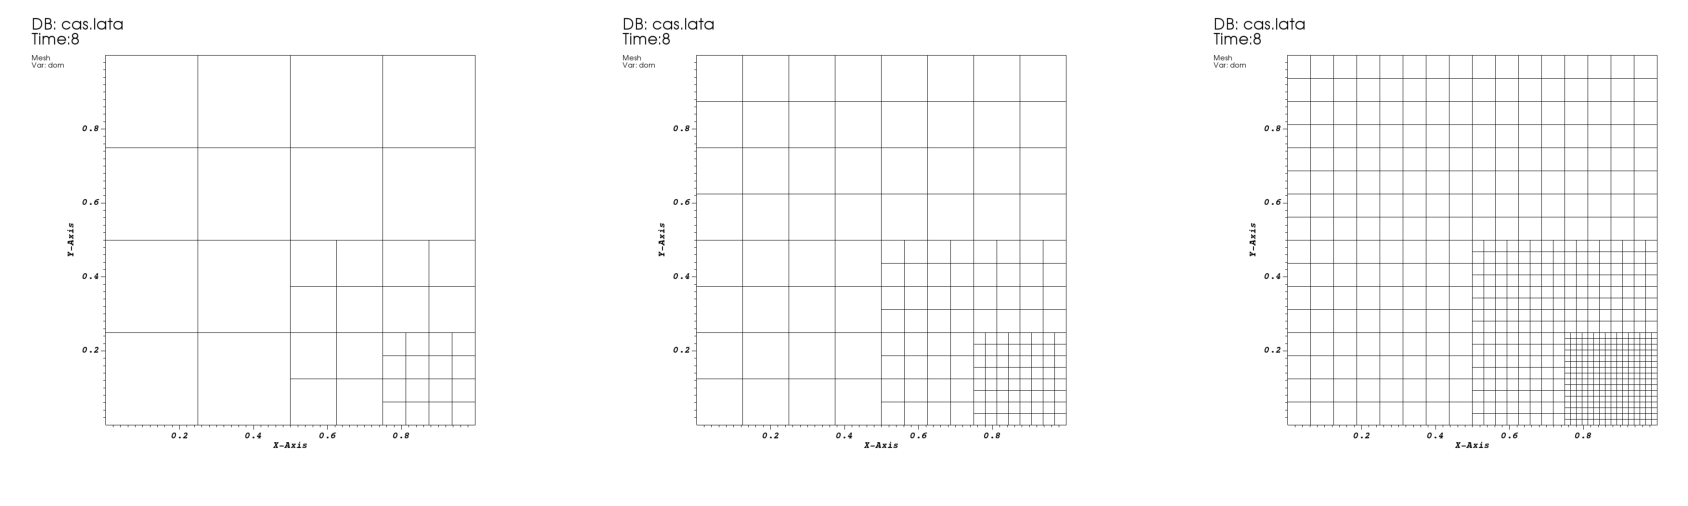

In [6]:
plot=visit.Show("Locally_Refined/jdd_1/cas.lata",field="Mesh",name="dom",nY=3) 
plot.add("Locally_Refined/jdd_2/cas.lata",field="Mesh",name="dom",yIndice=1) 
plot.add("Locally_Refined/jdd_3/cas.lata",field="Mesh",name="dom",yIndice=2)  
plot.plot()

## Convergence en maillage en vitesse
### Ordres de convergence

In [7]:
run.executeScript("extract_convergence")

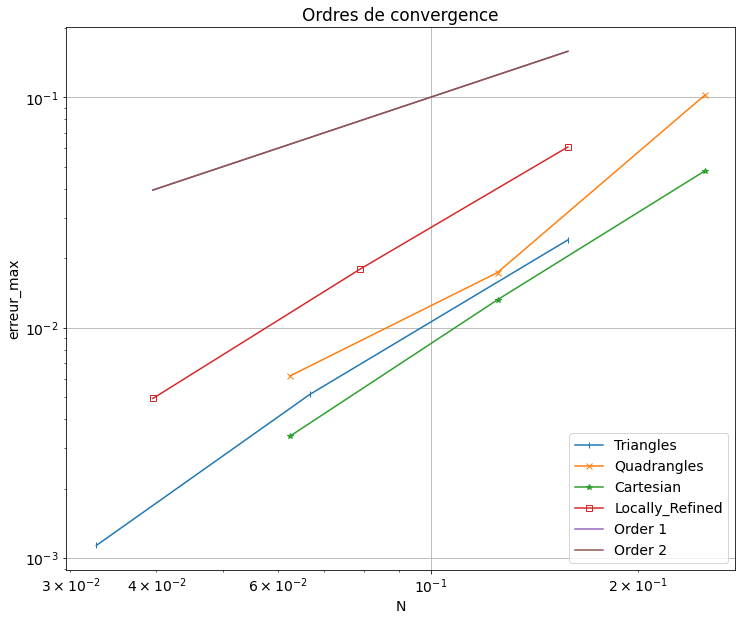

In [8]:
from trustutils import plot
import numpy as np

a=plot.Graph("Ordres de convergence")

data=plot.loadText("Triangles/conv_glob")
a.add(1/np.sqrt(data[0]),data[1],label="Triangles",marker='-|')

data=plot.loadText("Quadrangles/conv_glob")
a.add(1/np.sqrt(data[0]),data[1],label="Quadrangles",marker='-x')

data=plot.loadText("Cartesian/conv_glob")
a.add(1/np.sqrt(data[0]),data[1],label="Cartesian",marker='-*')

data=plot.loadText("Locally_Refined/conv_glob")
a.add(1/np.sqrt(data[0]),data[1],label="Locally_Refined",marker='-s',markerfacecolor='None')

x=np.linspace((1/np.sqrt(data[0]))[0],(1/np.sqrt(data[0]))[-1],100)
a.add(x,x,label="Order 1")

x=np.linspace((1/np.sqrt(data[0]))[0],(1/np.sqrt(data[0]))[-1],100)
a.add(x,x,label="Order 2")

a.label("N","erreur_max")
a.scale(xscale='log',yscale='log')



### Convergence de la solution sur maillage Triangles

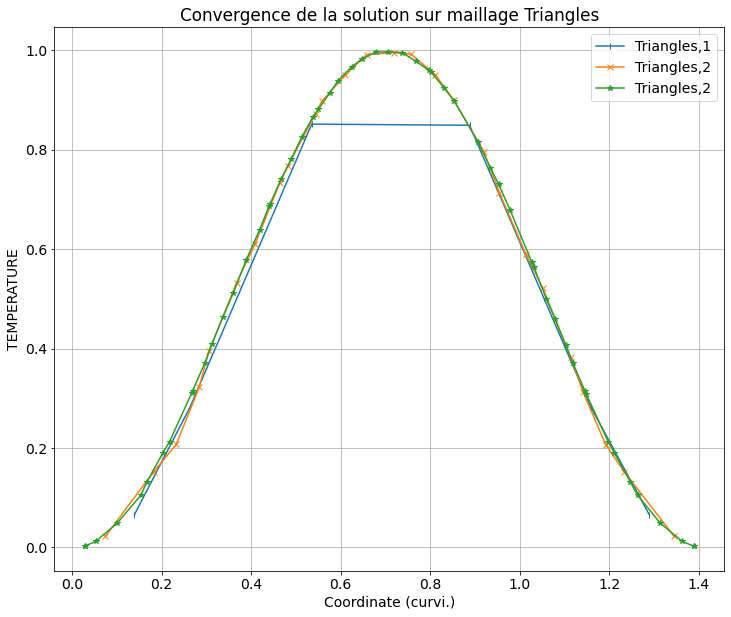

In [9]:
Graphique=plot.Graph("Convergence de la solution sur maillage Triangles")
Graphique.addSegment("Triangles/jdd_1/cas_TEMPERATURE_DIAG.son",label='Triangles,1',marker='-|')
Graphique.addSegment("Triangles/jdd_2/cas_TEMPERATURE_DIAG.son",label='Triangles,2',marker='-x')
Graphique.addSegment("Triangles/jdd_3/cas_TEMPERATURE_DIAG.son",label='Triangles,2',marker='-*')

### Convergence de la solution sur maillage Quadrangles

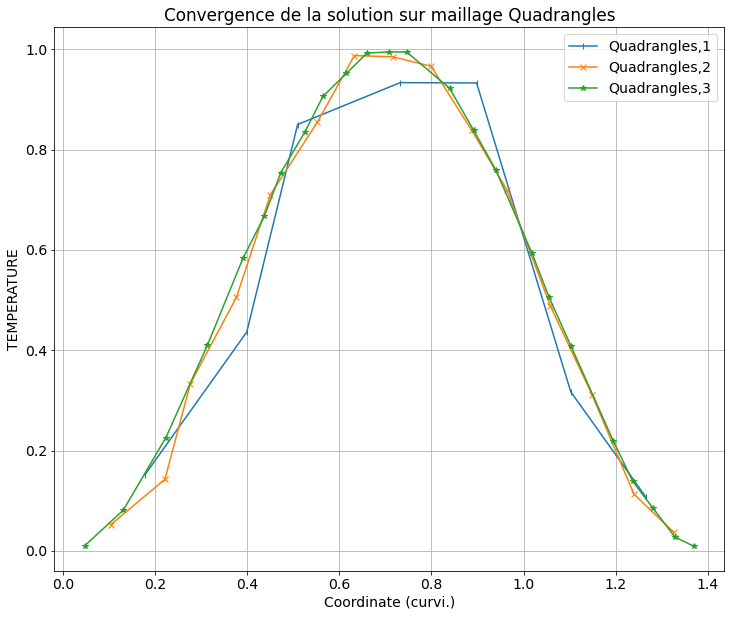

In [10]:
Graphique=plot.Graph("Convergence de la solution sur maillage Quadrangles")
Graphique.addSegment("Quadrangles/jdd_1/cas_TEMPERATURE_DIAG.son",label='Quadrangles,1',marker='-|')
Graphique.addSegment("Quadrangles/jdd_2/cas_TEMPERATURE_DIAG.son",label='Quadrangles,2',marker='-x')
Graphique.addSegment("Quadrangles/jdd_3/cas_TEMPERATURE_DIAG.son",label='Quadrangles,3',marker='-*')

### Convergence de la solution sur maillage Cartesian


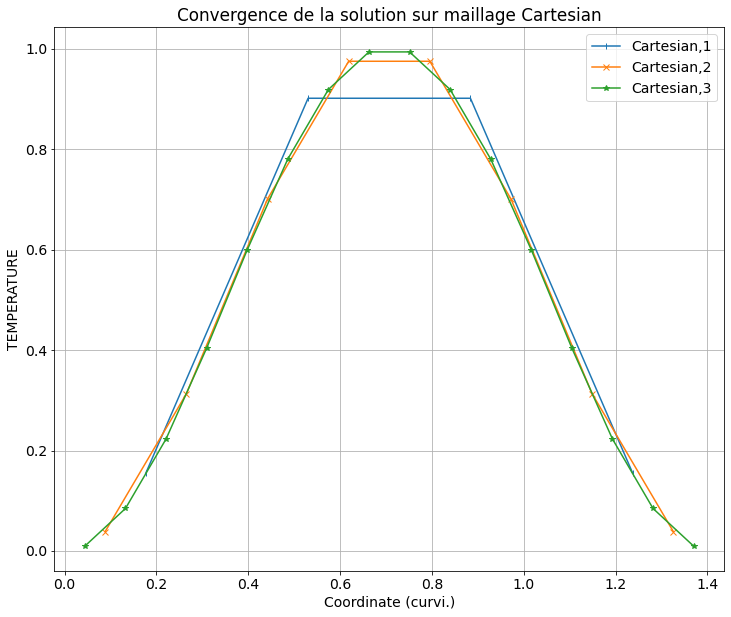

In [11]:
Graphique=plot.Graph("Convergence de la solution sur maillage Cartesian")
Graphique.addSegment("Cartesian/jdd_1/cas_TEMPERATURE_DIAG.son",label='Cartesian,1',marker='-|')
Graphique.addSegment("Cartesian/jdd_2/cas_TEMPERATURE_DIAG.son",label='Cartesian,2',marker='-x')
Graphique.addSegment("Cartesian/jdd_3/cas_TEMPERATURE_DIAG.son",label='Cartesian,3',marker='-*')

### Convergence de la solution sur maillage Locally_Refined

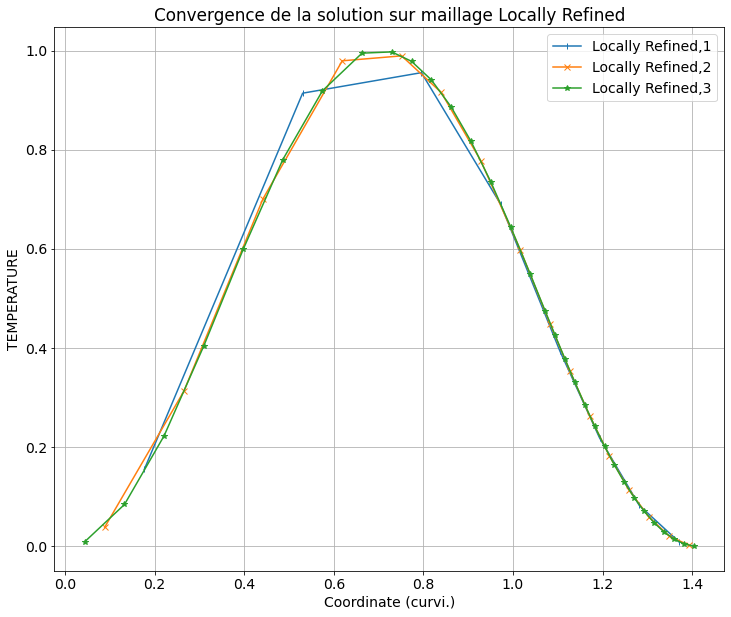

In [12]:
Graphique=plot.Graph("Convergence de la solution sur maillage Locally Refined")
Graphique.addSegment("Locally_Refined/jdd_1/cas_TEMPERATURE_DIAG.son",label='Locally Refined,1',marker='-|')
Graphique.addSegment("Locally_Refined/jdd_2/cas_TEMPERATURE_DIAG.son",label='Locally Refined,2',marker='-x')
Graphique.addSegment("Locally_Refined/jdd_3/cas_TEMPERATURE_DIAG.son",label='Locally Refined,3',marker='-*')